In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = load_iris();

In [3]:
X = iris['data']
y = iris['target']

In [4]:
n1, n2, n3 = 0,0,0;
for l in y:
    if l == 0:
        n1+=1
    elif l ==1:
        n2+=1
    else:
        n3+=1
print('There are',n1,'element in class 1')
print('There are',n3,'element in class 2')
print('There are',n3,'element in class 3')


There are 50 element in class 1
There are 50 element in class 2
There are 50 element in class 3


In [5]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X, y)
y_pred = model_knn.predict(X)
correct = np.sum(y_pred == y)
accur = correct/np.size(y_pred)
print("the accuracy of the KNN classifier on the iris dataset is",accur)
print("The result does not give me meaningful information")

the accuracy of the KNN classifier on the iris dataset is 1.0
The result does not give me meaningful information


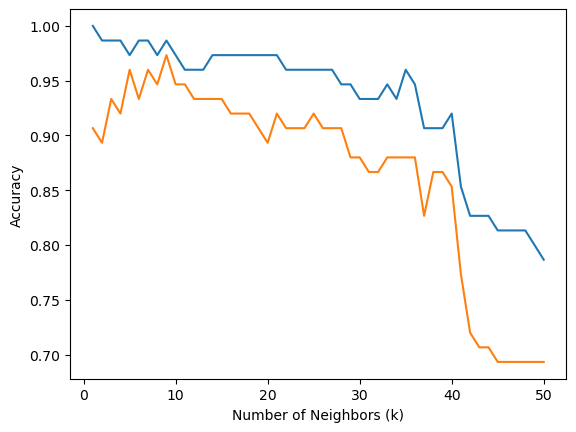

The best value k is 9


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)
accur_train = [] ;
accur_test = [];

for i in range (1,51):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    
    y_train_pred=model_knn.predict(X_train)
    accur_train.append(np.sum(y_train_pred==y_train)/np.size(y_train_pred))
    y_test_pred=model_knn.predict(X_test)
    accur_test.append(np.sum(y_test_pred==y_test)/np.size(y_test_pred))

    
k_range = np.arange(1, 51)
plt.figure();
plt.plot(k_range, accur_train)
plt.plot(k_range, accur_test)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

max_accur_test = max(accur_test)
best_k = accur_test.index(max_accur_test)+1 
print("The best value k is",best_k) 

In [7]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
new_flower = [[3.8, 5.0, 1.2, 4.1]]


best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

prediction = best_knn.predict(new_flower)
predicted_class = iris.target_names[prediction]

print("The predicted class for the observed flower is:", predicted_class)

The predicted class for the observed flower is: ['setosa']
